In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
csv_path = 'gs://astoria_base_dato/Yelp Checkin Business-ML.csv'

df = pd.read_csv(csv_path)

df

,business_id,date,state,is_open
0,-AdaSS3N7OsgnBGqh5EMQg,"2011-11-30 23:52:26, 2011-12-09 22:43:39, 2012...",PA,1
1,-GB_KiOOFoGdW09uuarqjQ,"2010-11-20 21:11:03, 2011-03-12 03:26:01, 2011...",AZ,1
2,0HAkgEHkJaazbxlX88m5BA,"2010-10-24 22:23:33, 2010-11-06 20:42:28, 2010...",PA,1
3,0XazM8VIswiJZ4-96raOjQ,"2016-08-07 00:24:13, 2016-10-23 18:47:28, 2016...",TN,1
4,0atrthcpxRQ3MiwgSY3zYg,"2011-06-25 15:58:23, 2011-07-14 18:42:35, 2011...",PA,1
...,...,...,...,...
235,xKpE6XPxZugTet-iZ6pEiw,"2012-08-03 23:49:52, 2012-11-10 18:55:31, 2013...",FL,1
236,xW4SUlN-xMJplSdXw_TMVw,"2018-01-27 04:29:11, 2018-02-16 02:40:54, 2018...",MO,1
237,xgmjCPInj447lZStaxau0Q,"2012-07-12 01:00:39, 2012-07-19 02:46:48, 2013...",AB,1
238,zGvBaY28FqD__tImfy7GuA,"2012-06-12 00:39:38, 2013-01-02 01:33:34, 2013...",MO,1


In [4]:
df["Apertura"] = pd.NaT
df["Cierre"] = pd.NaT

def process_dates(row):
    apertura_date = datetime.strptime(row['date'][:10],'%Y-%m-%d')
    row['Apertura'] = apertura_date

    if row['is_open'] == 1:
        row['Cierre'] = pd.NaT
    else:
        cierre_date_str = row['date'][-19:-9]
        cierre_date = datetime.strptime(cierre_date_str,'%Y-%m-%d') if cierre_date_str.strip() else pd.NaT
        if cierre_date <= datetime.strptime('2021-01-01','%Y-%m-%d'):
            row['Cierre'] = cierre_date
        else:
            row['Cierre'] = pd.NaT

    return row

df = df.apply(process_dates, axis=1)



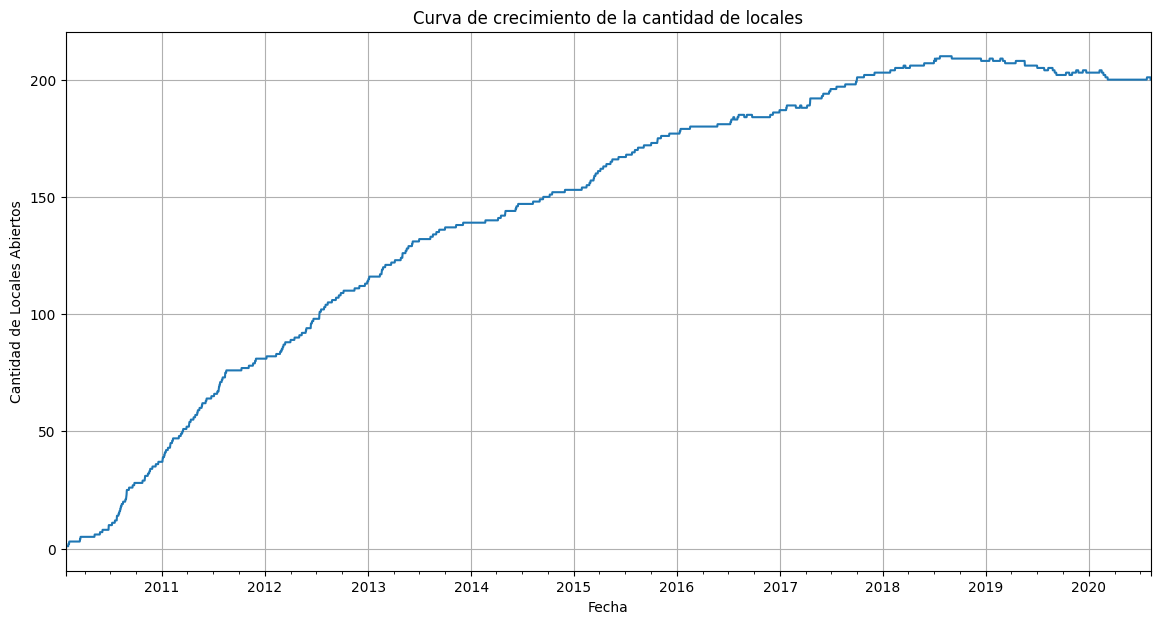

In [5]:

df['Apertura'] = pd.to_datetime(df['Apertura'], errors='coerce')
df['Cierre'] = pd.to_datetime(df['Cierre'], errors='coerce')

aperturas = df['Apertura'].value_counts().sort_index()
cierres = df['Cierre'].value_counts().sort_index()


timeline = pd.DataFrame(index=pd.date_range(start=df['Apertura'].min(), end=df['Cierre'].max()))

timeline = timeline.join(aperturas.rename('Aperturas')).fillna(0)
timeline = timeline.join(cierres.rename('Cierres')).fillna(0)


timeline['Neto'] = timeline['Aperturas'] - timeline['Cierres']

timeline['Total_Abiertos'] = timeline['Neto'].cumsum()


plt.figure(figsize=(14,7))
timeline['Total_Abiertos'].plot(title='Curva de crecimiento de la cantidad de locales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Locales Abiertos')
plt.grid(True)
plt.show()


/var/tmp/ipykernel_319542/3305785755.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Apertura'] = pd.to_datetime(df_state['Apertura'], errors='coerce')
/var/tmp/ipykernel_319542/3305785755.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Cierre'] = pd.to_datetime(df_state['Cierre'], errors='coerce')
/var/tmp/ipykernel_319542/3305785755.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

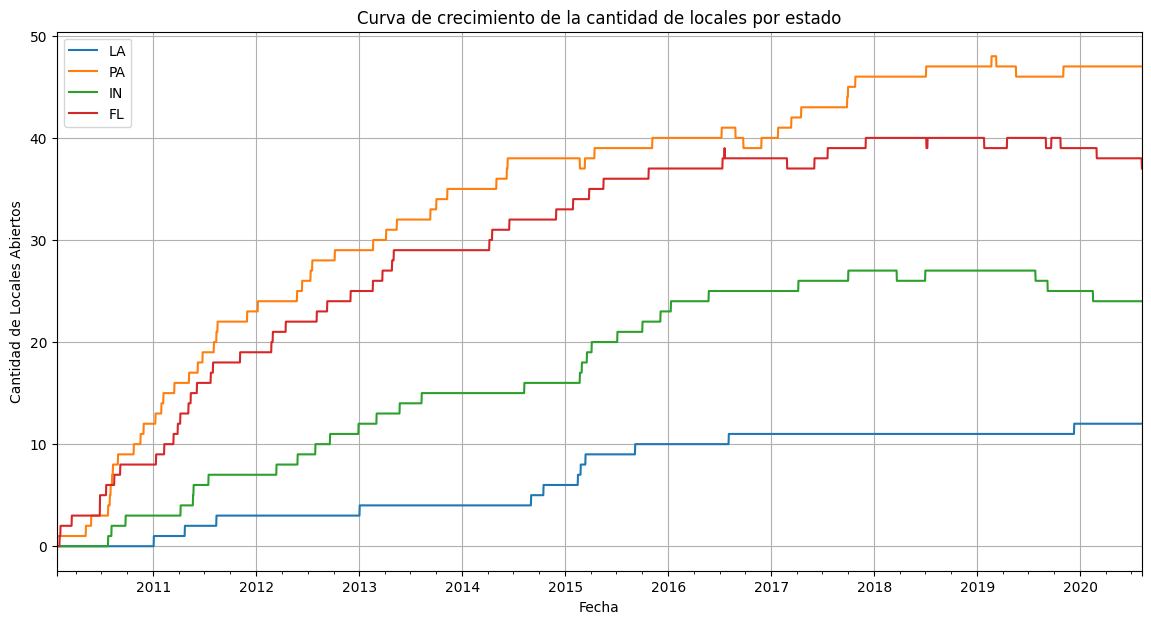

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_growth_curve(df, states):
    plt.figure(figsize=(14,7))
    
    for state in states:

        df_state = df[df['state'] == state]

        df_state['Apertura'] = pd.to_datetime(df_state['Apertura'], errors='coerce')
        df_state['Cierre'] = pd.to_datetime(df_state['Cierre'], errors='coerce')

        aperturas = df_state['Apertura'].value_counts().sort_index()
        cierres = df_state['Cierre'].value_counts().sort_index()

        timeline = pd.DataFrame(index=pd.date_range(start=df['Apertura'].min(), end=df['Cierre'].max()))

        timeline = timeline.join(aperturas.rename('Aperturas')).fillna(0)
        timeline = timeline.join(cierres.rename('Cierres')).fillna(0)

        timeline['Neto'] = timeline['Aperturas'] - timeline['Cierres']
        
        timeline['Total_Abiertos'] = timeline['Neto'].cumsum()
        
        timeline['Total_Abiertos'].plot(label=state)
    
    plt.title('Curva de crecimiento de la cantidad de locales por estado')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Locales Abiertos')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_growth_curve(df, ['LA','PA','IN','FL'])



In [7]:
csv_path = 'gs://astoria_base_dato/Yelp Reviwes Business-ML.csv'

df_reviews = pd.read_csv(csv_path)


In [8]:
avg_stars = df_reviews.groupby('business_id')['stars'].mean()
df['AvrStars'] = df['business_id'].map(avg_stars)


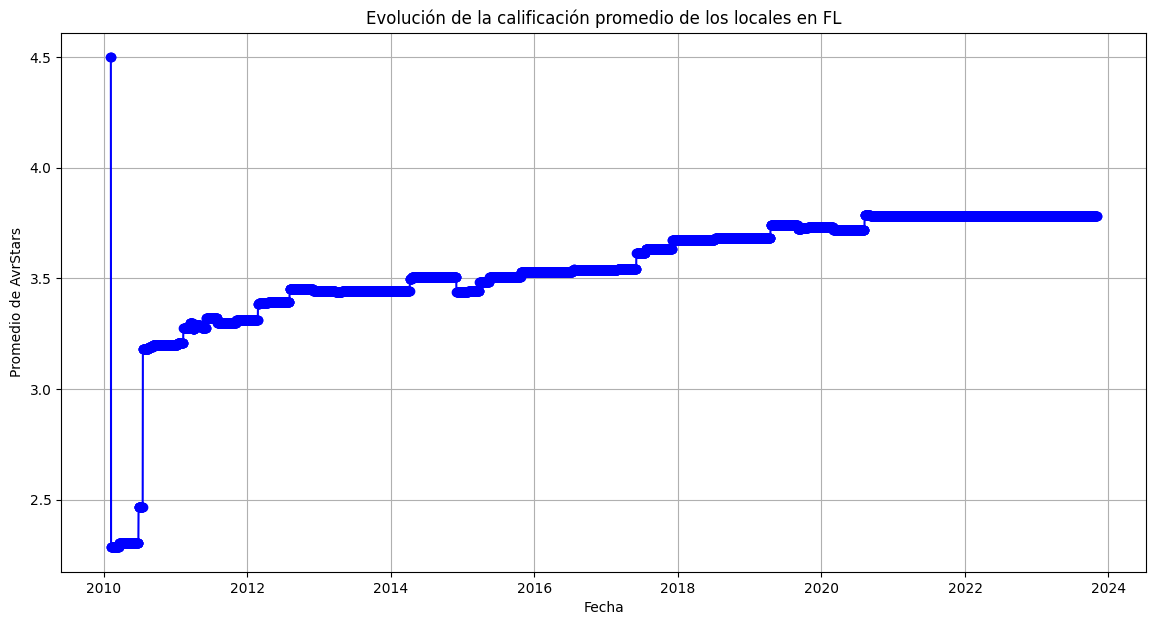

In [29]:
df['Apertura'] = pd.to_datetime(df['Apertura'])
df['Cierre'] = pd.to_datetime(df['Cierre'])

df_fl = df[df['state'] == 'FL']

dfs = []

for index, row in df_fl.iterrows():

    end_date = row['Cierre'] if pd.notnull(row['Cierre']) else pd.to_datetime('today')
    

    date_range = pd.date_range(start=row['Apertura'], end=end_date)
    
    temp_df = pd.DataFrame({'Date': date_range, 'AvrStars': [row['AvrStars']] * len(date_range)})
    

    dfs.append(temp_df)

scores_time_series = pd.concat(dfs)

scores_time_series = scores_time_series.groupby('Date').mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(scores_time_series['Date'], scores_time_series['AvrStars'], marker='o', linestyle='-', color='blue')
plt.title('Evolución de la calificación promedio de los locales en FL')
plt.xlabel('Fecha')
plt.ylabel('Promedio de AvrStars')
plt.grid(True)
plt.show()




NameError: name 'combined_df' is not defined

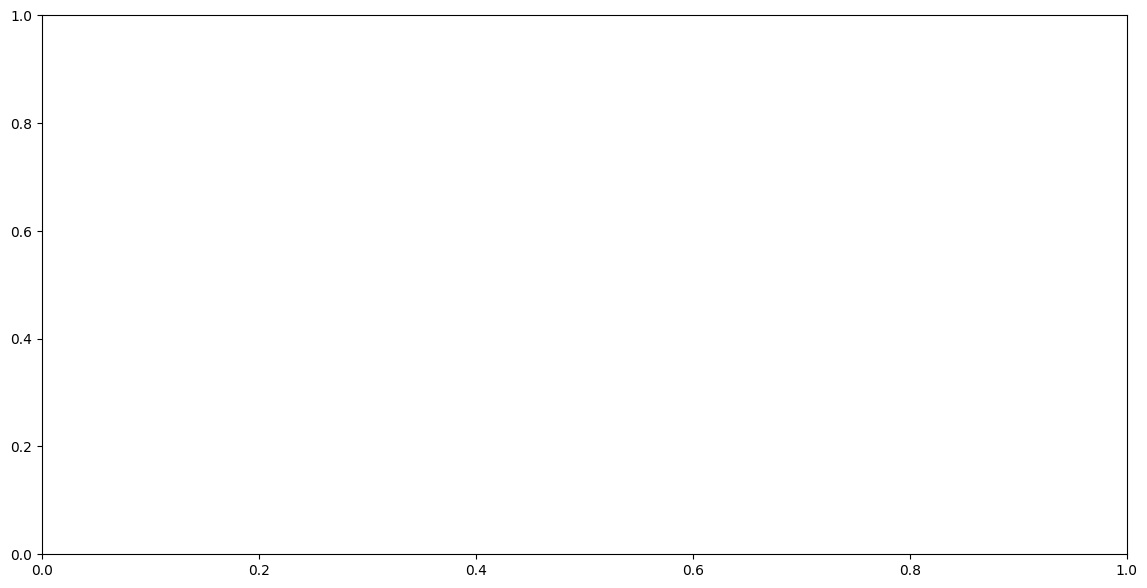

In [30]:
def graficar_estado(df, state):
    df_state = df[df['state'] == state]
    plt.figure(figsize=(14, 7))
    ax1 = plt.gca()
    ax1.plot(combined_df['Date'], combined_df['AvrStars'], color='blue', label='Avg Stars')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Promedio de AvrStars', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(0, 5)
    ax1.legend(loc='upper left')
    ax2 = ax1.twinx()
    ax2.plot(combined_df['Date'], combined_df['OpenCounts'], color='green', label='Open Locations')
    ax2.set_ylabel('Cantidad de Locales Abiertos', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')
    plt.title(f'Evolución de locales y calificación promedio en {state}')
    plt.grid(True)
    plt.show()

graficar_estado(df, 'FL')


In [11]:
def calculate_avrstars_and_count(df_state):
    start_date = df_state['Apertura'].min()
    end_date = df_state['Cierre'].max()

    if pd.isna(end_date) or end_date < pd.to_datetime('today'):
        end_date = pd.to_datetime('today')

    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    state_avrstars_counts = pd.DataFrame({'Date': date_range})
    state_avrstars_counts['AvrStars'] = 0.0
    state_avrstars_counts['OpenCounts'] = 0

    for date in date_range:
        open_locations = df_state[
            (df_state['Apertura'] <= date) &
            ((df_state['Cierre'] >= date) | pd.isna(df_state['Cierre']))
        ]
        
        if not open_locations.empty:
            avg_stars = open_locations['AvrStars'].mean()
            open_count = open_locations.shape[0]
        else:
            avg_stars = np.nan
            open_count = 0

        state_avrstars_counts.loc[state_avrstars_counts['Date'] == date, 'AvrStars'] = avg_stars
        state_avrstars_counts.loc[state_avrstars_counts['Date'] == date, 'OpenCounts'] = open_count

    state_avrstars_counts.dropna(subset=['AvrStars'], inplace=True)

    return state_avrstars_counts


In [12]:
def graficar_promedio_estados(df, estados):
    plt.figure(figsize=(14, 7))

    df_copy = df.copy()

    df_copy['Apertura'] = pd.to_datetime(df_copy['Apertura'])
    df_copy['Cierre'] = pd.to_datetime(df_copy['Cierre'])

    ax1 = plt.gca() 
    ax2 = ax1.twinx() 

    for estado in estados:
        df_estado = df_copy[df_copy['state'] == estado]
        state_avrstars_counts = calculate_avrstars_and_count(df_estado)
        
        ax1.plot(state_avrstars_counts['Date'], state_avrstars_counts['AvrStars'], label=f'{estado} Avg Stars', linestyle=':')
        ax2.plot(state_avrstars_counts['Date'], state_avrstars_counts['OpenCounts'], label=f'{estado} Open Locations')

    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Promedio de Estrellas (Avg Stars)', color='g')
    ax2.set_ylabel('Cantidad de Locales Abiertos (Open Locations)', color='b')

    ax1.set_ylim(0, 5)  
    ax2.set_ylim(bottom=0) 

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title('Promedio de Estrellas y Cantidad de Locales Abiertos por Estado a lo largo del Tiempo')
    plt.show()



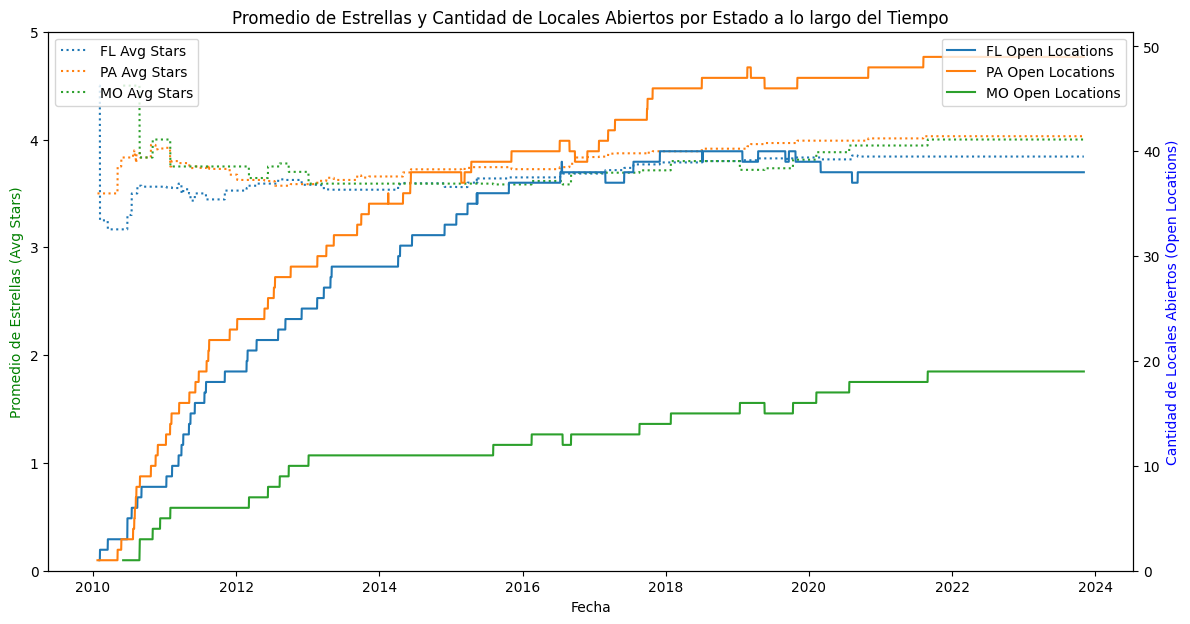

In [13]:
graficar_promedio_estados(df, ['FL', 'PA','MO'])


In [21]:

df['business_id'] = df['business_id'].astype(str)
df_reviews2['business_id'] = df_reviews2['business_id'].astype(str)

df = pd.merge(df, df_reviews2[['business_id', 'review_count']], on='business_id', how='left')
df


,business_id,date,state,is_open,Apertura,Cierre,AvrStars,review_count
0,-AdaSS3N7OsgnBGqh5EMQg,"2011-11-30 23:52:26, 2011-12-09 22:43:39, 2012...",PA,1,2011-11-30,NaT,2.5,7
1,-AdaSS3N7OsgnBGqh5EMQg,"2011-11-30 23:52:26, 2011-12-09 22:43:39, 2012...",PA,1,2011-11-30,NaT,2.5,7
2,-AdaSS3N7OsgnBGqh5EMQg,"2011-11-30 23:52:26, 2011-12-09 22:43:39, 2012...",PA,1,2011-11-30,NaT,2.5,7
3,-AdaSS3N7OsgnBGqh5EMQg,"2011-11-30 23:52:26, 2011-12-09 22:43:39, 2012...",PA,1,2011-11-30,NaT,2.5,7
4,-AdaSS3N7OsgnBGqh5EMQg,"2011-11-30 23:52:26, 2011-12-09 22:43:39, 2012...",PA,1,2011-11-30,NaT,2.5,7
...,...,...,...,...,...,...,...,...
5804,zwgd1Mf1NeGV4IgD3P9UlA,"2011-03-14 21:45:36, 2011-03-28 21:38:21, 2011...",FL,1,2011-03-14,NaT,4.0,13
5805,zwgd1Mf1NeGV4IgD3P9UlA,"2011-03-14 21:45:36, 2011-03-28 21:38:21, 2011...",FL,1,2011-03-14,NaT,4.0,13
5806,zwgd1Mf1NeGV4IgD3P9UlA,"2011-03-14 21:45:36, 2011-03-28 21:38:21, 2011...",FL,1,2011-03-14,NaT,4.0,13
5807,zwgd1Mf1NeGV4IgD3P9UlA,"2011-03-14 21:45:36, 2011-03-28 21:38:21, 2011...",FL,1,2011-03-14,NaT,4.0,13


In [23]:

df['Apertura'] = pd.to_datetime(df['Apertura'])
df['Cierre'] = pd.to_datetime(df['Cierre'])

# Filtra por estado
df_fl = df[df['state'] == 'FL']

# Crea un rango de fechas desde el 2013 hasta hoy
date_range = pd.date_range(start='2013-01-01', end=pd.to_datetime('today'), freq='D')

# Prepara un DataFrame para almacenar los resultados
results = {
    'Date': [],
    'OpenBusinesses': [],
    'AvgStars': [],
    'TotalReviews': []
}

# Calcula la información requerida para cada fecha en el rango
for current_date in date_range:
    # Negocios abiertos en esta fecha
    open_businesses = df_fl[(df_fl['Apertura'] <= current_date) & ((df_fl['Cierre'].isna()) | (df_fl['Cierre'] >= current_date))]
    results['Date'].append(current_date)
    results['OpenBusinesses'].append(len(open_businesses))
    results['AvgStars'].append(open_businesses['AvrStars'].mean() if not open_businesses.empty else 0)
    results['TotalReviews'].append(open_businesses['review_count'].sum() if not open_businesses.empty else 0)

# Crea el DataFrame final
results_df = pd.DataFrame(results)

# Muestra los primeros registros
print(results_df)



           Date  OpenBusinesses  AvgStars  TotalReviews
0    2013-01-01             745  3.443624         78115
1    2013-01-02             745  3.443624         78115
2    2013-01-03             745  3.443624         78115
3    2013-01-04             745  3.443624         78115
4    2013-01-05             745  3.443624         78115
...         ...             ...       ...           ...
3954 2023-10-30            1179  3.782443        103213
3955 2023-10-31            1179  3.782443        103213
3956 2023-11-01            1179  3.782443        103213
3957 2023-11-02            1179  3.782443        103213
3958 2023-11-03            1179  3.782443        103213

[3959 rows x 4 columns]


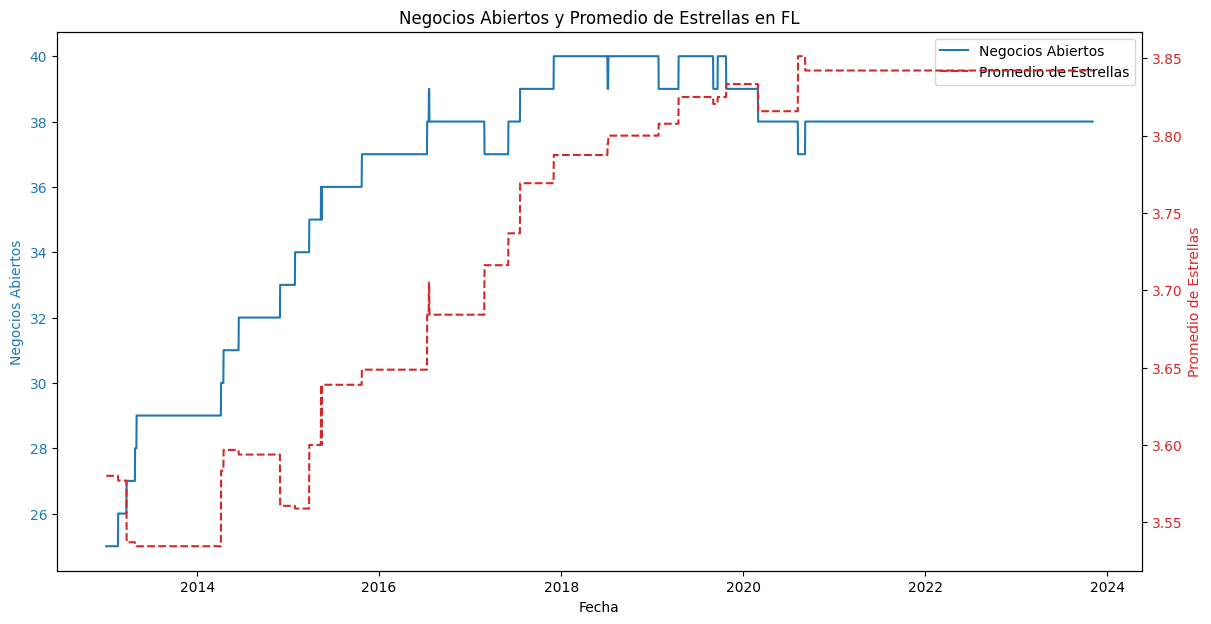

In [17]:
import matplotlib.pyplot as plt

# Asegúrate de que fl_stats ya está definido y calculado como se mostró previamente

# Crear un gráfico de dos ejes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico para 'OpenBusinesses'
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Negocios Abiertos', color=color)
lns1 = ax1.plot(fl_stats['Fecha'], fl_stats['OpenBusinesses'], label='Negocios Abiertos', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje Y para los 'AvgStars'
ax2 = ax1.twinx()  # instanciar un segundo eje que comparte el mismo eje x
color = 'tab:red'
ax2.set_ylabel('Promedio de Estrellas', color=color)  # we already handled the x-label with ax1
lns2 = ax2.plot(fl_stats['Fecha'], fl_stats['AvgStars'], label='Promedio de Estrellas', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Título y leyenda
plt.title('Negocios Abiertos y Promedio de Estrellas en FL')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

# Mostrar la gráfica
plt.show()


In [25]:
import pandas as pd

# Supongamos que 'df' ya está filtrado para el estado 'FL'
# y que 'df' ya tiene una columna 'review_count' con el conteo de reviews.

# Rellenamos los NaT de la columna 'Cierre' con la fecha actual.
df['Cierre'] = df['Cierre'].fillna(pd.to_datetime('today'))

# Convertimos las columnas 'Apertura' y 'Cierre' a datetime si aún no lo están.
df['Apertura'] = pd.to_datetime(df['Apertura'])
df['Cierre'] = pd.to_datetime(df['Cierre'])

# Definimos el rango de fechas para nuestro análisis desde 2013 hasta la fecha actual.
start_date = pd.Timestamp('2013-01-01')
end_date = pd.to_datetime('today')

# Creamos el DataFrame fl_stats con una fila por cada fecha en el rango definido.
date_range = pd.date_range(start_date, end_date)
fl_stats = pd.DataFrame(date_range, columns=['Fecha'])

# Calculamos 'OpenBusinesses' y 'TotalReviews' para cada fecha.
# Inicializamos las columnas para luego actualizar sus valores.
fl_stats['OpenBusinesses'] = 0
fl_stats['TotalReviews'] = 0

for single_date in date_range:
    # Negocios abiertos en 'single_date'
    open_businesses = df[(df['Apertura'] <= single_date) & (df['Cierre'] >= single_date)]
    fl_stats.loc[fl_stats['Fecha'] == single_date, 'OpenBusinesses'] = len(open_businesses)
    
    # Suma acumulada de 'review_count' hasta 'single_date'
    fl_stats.loc[fl_stats['Fecha'] == single_date, 'TotalReviews'] = open_businesses['review_count'].sum()

# Ahora fl_stats tiene una fila por fecha con los negocios abiertos y las reviews acumuladas hasta esa fecha.



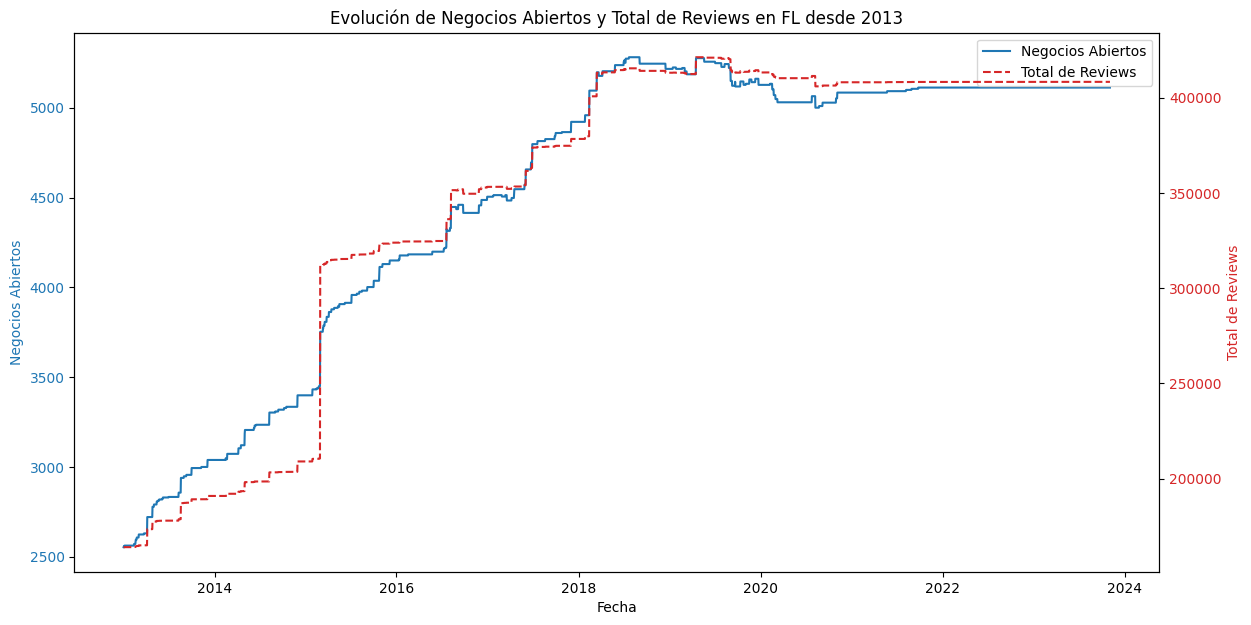

In [26]:
import matplotlib.pyplot as plt

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Graficar 'OpenBusinesses'
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Negocios Abiertos', color=color)
lns1 = ax1.plot(fl_stats['Fecha'], fl_stats['OpenBusinesses'], label='Negocios Abiertos', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje para 'TotalReviews'
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total de Reviews', color=color)
lns2 = ax2.plot(fl_stats['Fecha'], fl_stats['TotalReviews'], label='Total de Reviews', color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título y leyenda
plt.title('Evolución de Negocios Abiertos y Total de Reviews en FL desde 2013')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

# Mostrar el gráfico
plt.show()
